<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%202/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo">
</center>

# Plotting directly with Matplotlib

Estimated time needed: **45** minutes

## Objectives

After completing this lab you will be able to:

*   Create and customize basic plots directly with Matplotlib on dataset


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Import Libraries](#0)<br>
2.  [Fetching Data](#1) <br>
3.  [Line Plot](#6) <br>
4.  [Scatter Plot](#8) <br>
5.  [Bar Plot](#10) <br>
6.  [Histogram](#12) <br>
7.  [Pie](#14) <br>
8.  [Subplotting](#16) <br>
</div>


# Import Libraries<a id="0"></a>


Import the `matplotlib` library.


In [1]:
#Import Primary Modules:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.9.2


# Fetching Data<a id="1"></a>

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows) from United Nation's website.<br>
In this lab, we will focus on the Canadian Immigration data and use the *already cleaned dataset* and can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv">here</a>.
<br><br>
You can refer to the lab on data pre-processing wherein this dataset is cleaned for a quick refresh your Panads skill [Data pre-processing with Pandas](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/june2023_updates/Module%201/DV0101EN-Exercise-Dataset-Preprocessing-Exploring-with-Pandas.ipynb)


In [2]:
import requests
import pandas as pd
import io

# Define the URL
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv"

# Send a GET request to the URL
response = requests.get(URL)

# Convert the content into a BytesIO object
text = io.BytesIO(response.content)

# Read the CSV data into a pandas dataframe
df_can = pd.read_csv(text)

# Print confirmation
print('Data read into a pandas dataframe!')


Data read into a pandas dataframe!


Let's take a look at the first five items in our dataset.


In [3]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Let's find out how many entries there are in our dataset.


In [4]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 39)


Set the country name as index - useful for quickly looking up countries using .loc method.


In [5]:
df_can.set_index('Country', inplace=True)

# Let's view the first five elements and see how the dataframe was changed
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Notice now the country names now serve as indices.


In [6]:
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [7]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))
#years = np.arange(1980,2014)

# Line Plot<a id="6"></a>


A line plot displays the relationship between two continuous variables over a continuous interval, showing the trend or pattern of the data.<br><br>Let's created a line plot to visualize the immigrants (to Canada) trend during 1980 to 2013.<br>We need the Total of year-wise immigrants,<br><br>We will create a new dataframe for only columns containing the years<br> then, we will apply sum() on the dataframe<br><br>You can do create a line plot directly on **axes** by calling plot function **plot()**


In [8]:
#As years is in the array format, you will be required to map it to str for plotting
#y=list(map(str, years))

#creating df with only years columns from 1980 - 2013
df_line=df_can[years]

#Applying sum to get total immigrants year-wise
total_immigrants=df_line.sum()
total_immigrants

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64

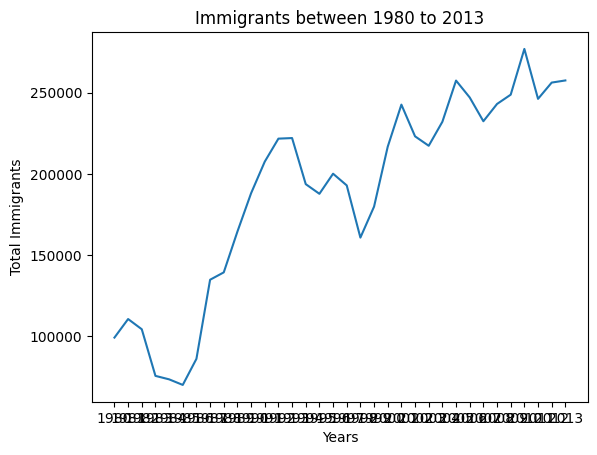

In [9]:
#Create figure and axes
fig, ax = plt.subplots()

# Plot the line
ax.plot(total_immigrants)

#Setting up the Title
ax.set_title('Immigrants between 1980 to 2013') 
#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

#Display the plot
plt.show()

#### The plot function populated the x-axis with the index values (years), and the y-axis with the column values (population). <br>However, notice how the years were not displayed because they are of type string.<br> <br>Therefore, let's change the type of the index values to integer for plotting.


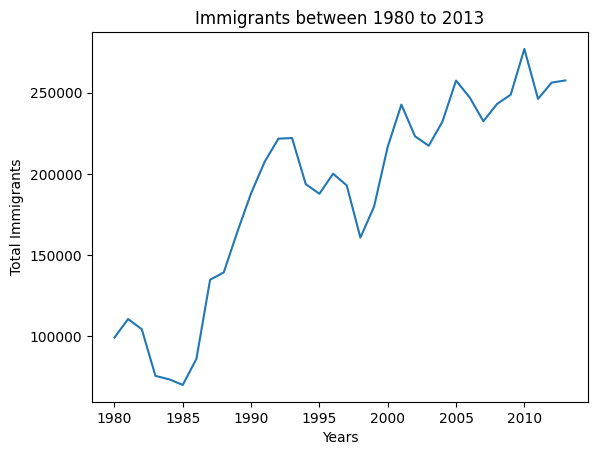

In [10]:
#Create figure and axes
fig, ax = plt.subplots()

#Changing the index type to integer
total_immigrants.index = total_immigrants.index.map(int)

# Plot the line
ax.plot(total_immigrants)

#Setting up the Title
ax.set_title('Immigrants between 1980 to 2013') 

#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

#Display the plot
plt.show()

#### Let's now customize the above plot's appearance 


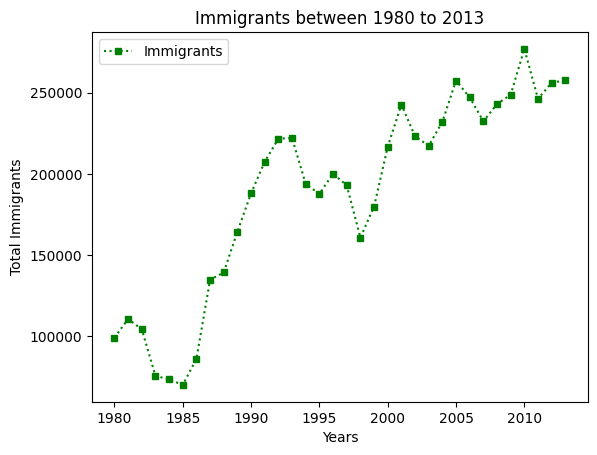

In [11]:
#Create figure and axes
fig, ax = plt.subplots()

#Changing the index type to integer
total_immigrants.index = total_immigrants.index.map(int)

# Customizing the appearance of Plot
ax.plot(total_immigrants, 
        marker='s', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='green', #Changing the color of the line
        linestyle="dotted") #Changing the line style to a Dotted line
#Setting up the Title
ax.set_title('Immigrants between 1980 to 2013') 

#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')
ax.legend(['Immigrants'])

plt.show()

#### Let's include the background grid, a legend and try to change the limits on the axis


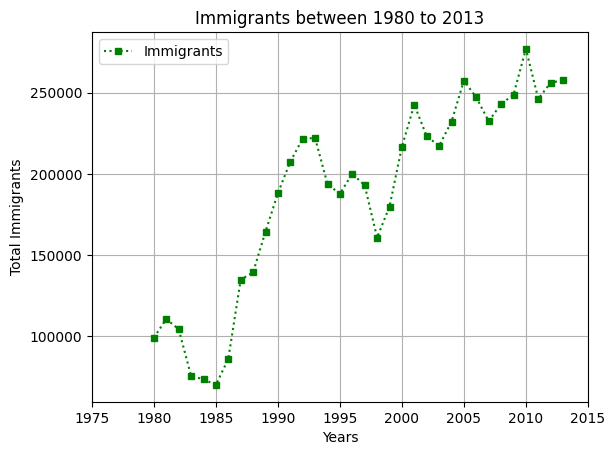

In [12]:
#Create figure and axes
fig, ax = plt.subplots()

# Plot the line
ax.plot(total_immigrants, 
        marker='s', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='green', #Changing the color of the line
        linestyle="dotted") #Changing the line style to a Dotted line

#Setting up the Title
ax.set_title('Immigrants between 1980 to 2013') 

#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

#limits on x-axis
plt.xlim(1975, 2015)  #or ax.set_xlim()

#Enabling Grid
plt.grid(True)  #or ax.grid()

#Legend
plt.legend(["Immigrants"]) #or ax.legend()

#Display the plot
plt.show()

Let's start with a case study:

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a Line plot:

### Question: Plot a line graph of immigration from Haiti 


You be required to create a dataframe where the name of the 'Country' is equal to 'Haiti' and years from 1980 - 2013<br> Also you will be required to transpose the new dataframe in to a series for plotting<br>Might also have to change the type of index of the series to integer for a better look of the plot<br> Then create fig and ax and call function plot() on the data.


<details><summary>Click here for a sample python solution</summary>

```python
    #Creating data for plotting
    df_can.reset_index(inplace=True)
    haiti=df_can[df_can['Country']=='Haiti']

    #creating haiti with only years columns from 1980 - 2013 
    #and transposing to get the result as a series
    haiti=haiti[years].T

    #converting the index to type integer
    haiti.index = haiti.index.map(int)
    
    #Plotting the line plot on the data
    fig, ax = plt.subplots()
    ax.plot(haiti)
    #Setting up the Title
    ax.set_title('Immigrants from Haiti between 1980 to 2013') 
    #Setting up the Labels
    ax.set_xlabel('Years')
    ax.set_ylabel('Number of Immigrants')
    #Enabling Grid
    #plt.grid(True)  #or ax.grid()
    #Legend
    plt.legend(["Immigrants"]) #or ax.legend()
    #Display the plot
    plt.show()
```
</details>


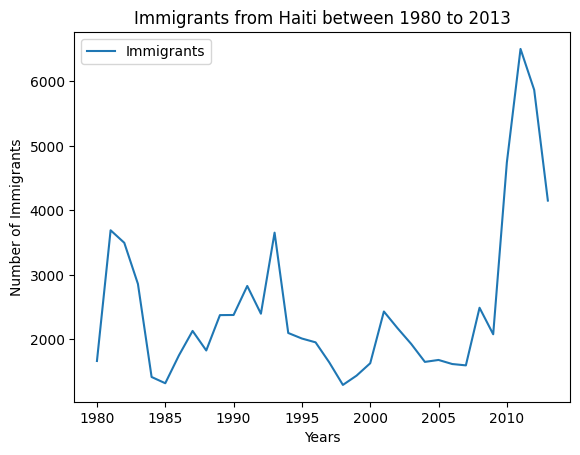

In [13]:
#Creating data for plotting
df_can.reset_index(inplace=True)
haiti=df_can[df_can['Country']=='Haiti']

    #creating haiti with only years columns from 1980 - 2013 
    #and transposing to get the result as a series
haiti=haiti[years].T

    #converting the index to type integer
haiti.index = haiti.index.map(int)
    
    #Plotting the line plot on the data
fig, ax = plt.subplots()
ax.plot(haiti)
    #Setting up the Title
ax.set_title('Immigrants from Haiti between 1980 to 2013') 
    #Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')
    #Enabling Grid
    #plt.grid(True)  #or ax.grid()
    #Legend
plt.legend(["Immigrants"]) #or ax.legend()
    #Display the plot
plt.show()

#### We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. <br>Let's annotate this spike in the plot by using the *ax.annotate()* method.


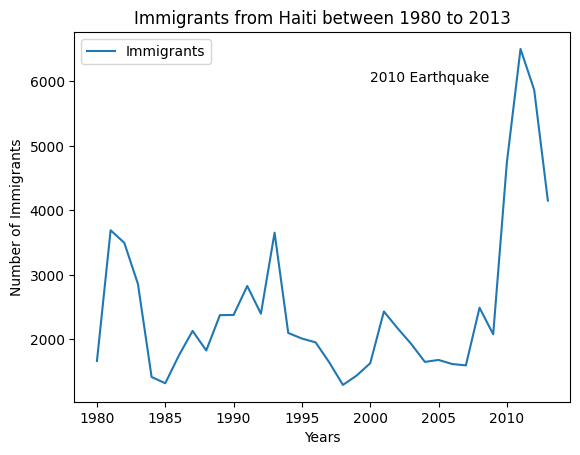

In [14]:
fig, ax = plt.subplots()

ax.plot(haiti)

#Setting up the Title
ax.set_title('Immigrants from Haiti between 1980 to 2013') 

#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')

#Enabling Grid and ticks
#plt.grid(True)  #or ax.grid()
#ax.set_xticks(list(range(n, m, s)))

#Legend
plt.legend(["Immigrants"]) #or ax.legend()

ax.annotate('2010 Earthquake',xy=(2000, 6000))
plt.show()

You can also specify the ticks to be displayed on the plot like this - ax.set_xticks(list(range(1980, 2015,5)))


---


# Scatter Plot<a id="8"></a>


A scatter plot visualizes the relationship between two continuous variables, displaying individual data points as dots on a two-dimensional plane, allowing for the examination of patterns, clusters, and correlations.<br><br>Let's created a *Scatter plot* to visualize the immigrants (to Canada) trend during 1980 to 2013.<br>We need the Total of year-wise immigrants,<br><br>We will create a new dataframe for only columns containing the years<br> then, we will apply sum() on the dataframe<br><br>You can do create a scatter plot directly on **ax** by calling plot function **scatter()**


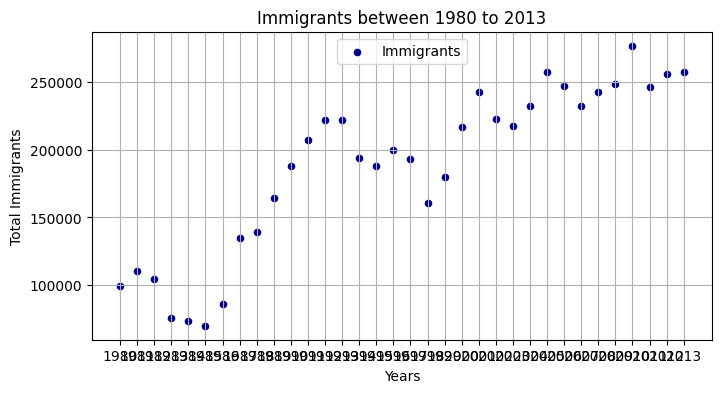

In [15]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

# Customizing Scatter Plot 
ax.scatter(years, total_immigrants, 
           marker='o', #setting up the markers
           s = 20, #setting up the size of the markers
           color='darkblue')#the color for the marker

#add title 
plt.title('Immigrants between 1980 to 2013') 
#add labels 
plt.xlabel('Years')
plt.ylabel('Total Immigrants') 
#including grid
plt.grid(True)

#Legend at upper center of the figure
ax.legend(["Immigrants"], loc='upper center')

#Display the plot
plt.show()

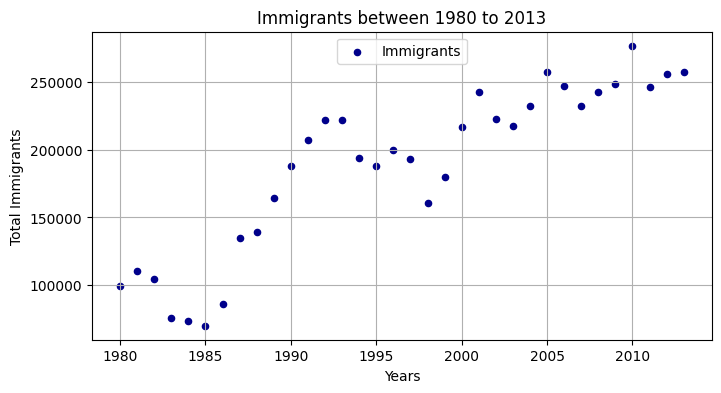

In [16]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

total_immigrants.index = total_immigrants.index.map(int)

# Customizing Scatter Plot 
ax.scatter(total_immigrants.index, total_immigrants, 
           marker='o', #setting up the markers
           s = 20, #setting up the size of the markers
           color='darkblue')#the color for the marker

#add title 
plt.title('Immigrants between 1980 to 2013') 
#add labels 
plt.xlabel('Years')
plt.ylabel('Total Immigrants') 
#including grid
plt.grid(True)

#Legend at upper center of the figure
ax.legend(["Immigrants"], loc='upper center')

#Display the plot
plt.show()

### Refer to the [matplotlib documentation](https://matplotlib.org/stable/api/markers_api.html) and change the marker and its size, color in the above code to see the difference in the appearance of the plot


---


# Bar Plot<a id="10"></a>


A bar plot represents categorical data with rectangular bars, where the height of each bar corresponds to the value of a specific category, making it suitable for comparing values across different categories.<br><br>Let's create a bar plot to visualize the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013. 
<br><br>Apply sort_values function on the 'Total' column of our data<br><br>We will create a new dataframe for only columns containing the years<br> then, we will apply sum() on the dataframe and can create a separatedataframe for top five countries<br><br>You can further use the names of the countries to label each bar on the plot


In [17]:
#Sorting the dataframe on 'Total' in descending order
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries with head function
df_top5 = df_can.head()

#resetting the index back to original way
df_bar_5=df_top5.reset_index()

#Creating alist of names of the top 5 countries
label=list(df_bar_5.Country)
label

['India',
 'China',
 'United Kingdom of Great Britain and Northern Ireland',
 'Philippines',
 'Pakistan']

##### The third name is too lengthy to fit on the x-axis as label. Let's fix this using indexing


In [18]:
label[2]='UK'
label

['India', 'China', 'UK', 'Philippines', 'Pakistan']

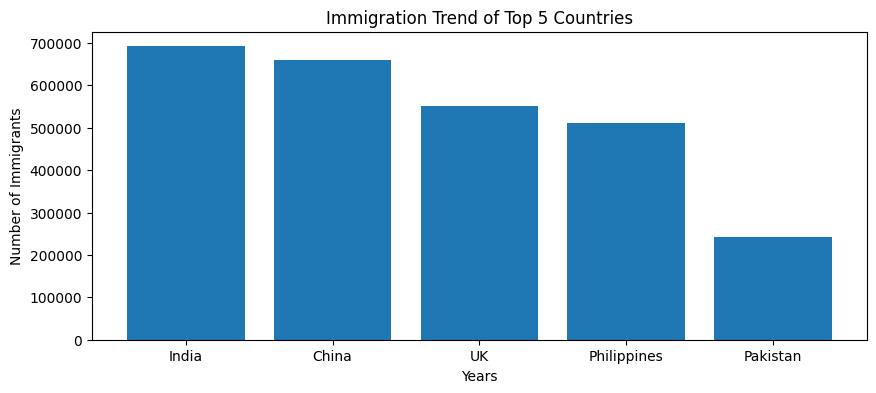

In [19]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(label,df_bar_5['Total'], label=label)
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.show()

### Question: Create a bar plot of the 5 countries that contributed the **least** to immigration to Canada **from** 1980 to 2013. 


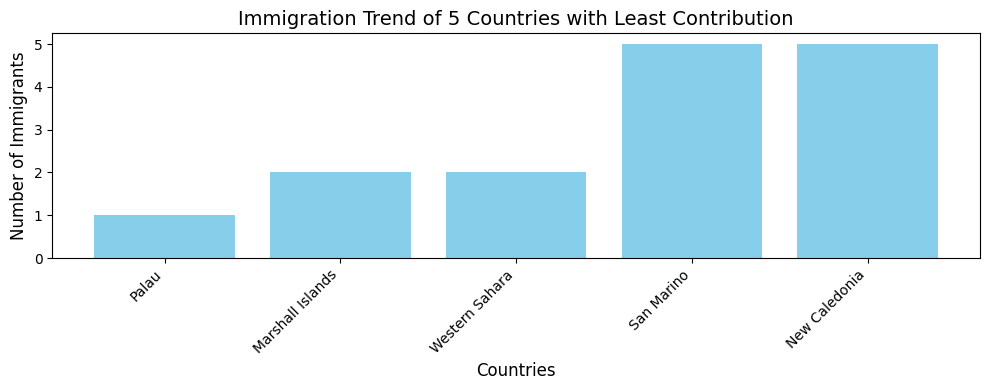

In [20]:
# Sorting the dataframe by 'Total' in ascending order to get countries with least immigration
df_can.sort_values(['Total'], ascending=True, axis=0, inplace=True)

# Get the 5 countries with the least contribution
df_least5 = df_can.head(5)

# Resetting the index
df_least5_bar = df_least5.reset_index()

# Creating a list of country names for labels
labels = list(df_least5_bar['Country'])

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(labels, df_least5_bar['Total'], color='skyblue')
ax.set_title('Immigration Trend of 5 Countries with Least Contribution', fontsize=14)
ax.set_ylabel('Number of Immigrants', fontsize=12)
ax.set_xlabel('Countries', fontsize=12)

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.tight_layout()
plt.show()


<details><summary>Click here for a sample python solution</summary>

```python
    #Sorting the dataframe on 'Total' in descending order
    df_can.sort_values(['Total'], ascending=True, axis=0, inplace=True)

    # get the top 5 entries with head function
    df_least5 = df_can.head()

    #resetting the index back to original way
    df_least5_bar=df_least5.reset_index()

    #Creating alist of names of the top 5 countries
    label=list(df_least5_bar.Country)
    #label

    fig, ax = plt.subplots(figsize=(10, 4))

    ax.bar(label, df_least5_bar['Total'],label=label)
    ax.set_title('Immigration Trend of Top 5 Countries')
    ax.set_ylabel('Number of Immigrants')
    ax.set_xlabel('Years')

    plt.show()
 ```
    </details>


---


# Histogram<a id="12"></a>


A histogram is a way of representing the *frequency* distribution of numeric dataset. The way it works is it partitions the x-axis into *bins*, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.
<br><br>Let's find out the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?<br>


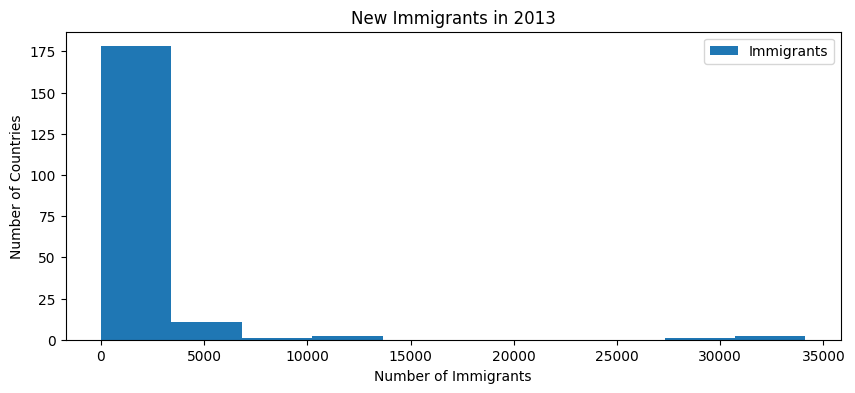

In [21]:
df_country = df_can.groupby(['Country'])['2013'].sum().reset_index()

#Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df_country['2013'])
ax.set_title('New Immigrants in 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.legend(['Immigrants'])

#Display the plot
plt.show()

Our plot doesnot match with the bars<br>By default, the `histrogram` method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013<br> The hist function retuns list of arrays with 1. counts and 2. bins. we can fetch that using unpacking functionality <br> and further use the bins as x-ticks


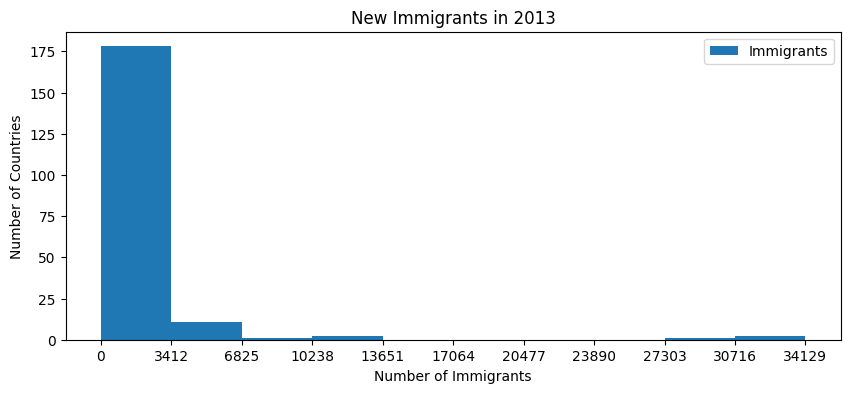

In [22]:
# Plot the bar
fig, ax = plt.subplots(figsize=(10, 4))
count = ax.hist(df_country['2013'])

#you can check the arrays in count with indexing count[0] for count, count[1] for bins

ax.set_title('New Immigrants in 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.set_xticks(list(map(int,count[1])))
ax.legend(['Immigrants'])

#Display the plot
plt.show()

#### We can also plot multiple histograms on the same plot. For example, let's try to answer the following questions using a histogram.

#### What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?


In [23]:
# let's quickly view the dataset 
df=df_can.groupby(['Country'])[years].sum()
df_dns=df.loc[['Denmark', 'Norway', 'Sweden'], years]
df_dns=df_dns.T
df_dns

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


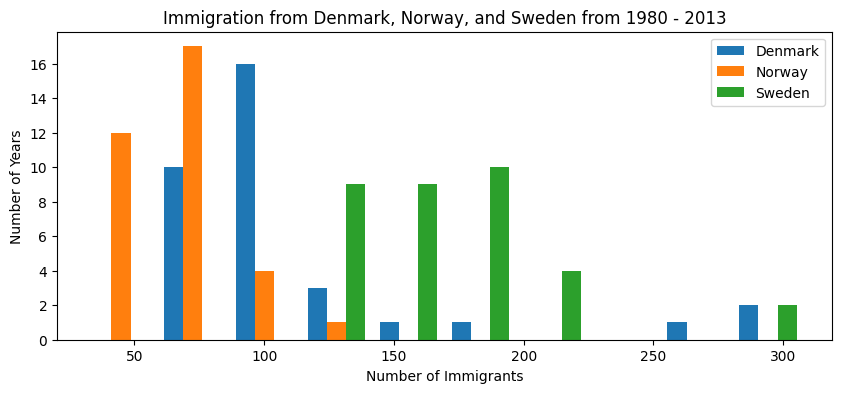

In [24]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df_dns)
ax.set_title('Immigration from Denmark, Norway, and Sweden from 1980 - 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Years')
ax.legend(['Denmark', 'Norway', 'Sweden'])
#Display the plot
plt.show()

### Question: What is the immigration distribution for China and India for years 2000 to 2013?


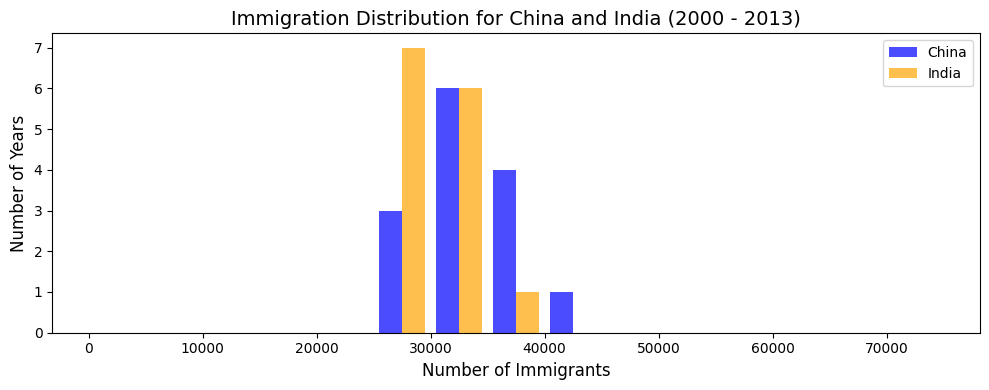

In [25]:
# Group by 'Country' and get immigration data for years 2000 to 2013
df = df_can.groupby(['Country'])[years].sum()

# Filter the years from 2000 to 2013
selected_years = list(map(str, range(2000, 2014)))
df_ci = df.loc[['China', 'India'], selected_years]

# Transpose the data to make years the x-axis
df_ci = df_ci.T

# Plotting the histogram
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist([df_ci['China'], df_ci['India']], bins=range(0, 80000, 5000), alpha=0.7, label=['China', 'India'], color=['blue', 'orange'])

# Adding titles and labels
ax.set_title('Immigration Distribution for China and India (2000 - 2013)', fontsize=14)
ax.set_xlabel('Number of Immigrants', fontsize=12)
ax.set_ylabel('Number of Years', fontsize=12)

# Adding legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


<details><summary>Click here for a sample python solution</summary>

```python
    # let's quickly view the dataset 
    df=df_can.groupby(['Country'])[years].sum()
    y=list(map(str,range(2000, 2014)))
    df_ci=df.loc[['China', 'India'], y]
    df_ci=df_ci.T
    #df_ci
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.hist(df_ci)
    ax.set_title('Immigration from Denmark, Norway, and Sweden from 1980 - 2013') 
    ax.set_xlabel('Number of Immigrants')
    ax.set_ylabel('Number of Years')
    ax.legend(['China', 'India'])
    #Display the plot
    plt.show()
```
</details>


---


# Pie Chart<a id="14"></a>

A pie chart represents the proportion or percentage distribution of different categories in a dataset using sectors of a circular pie.
<br> Let's create a pie chart representing the 'Total Immigrants' for the year 1980 to 1985


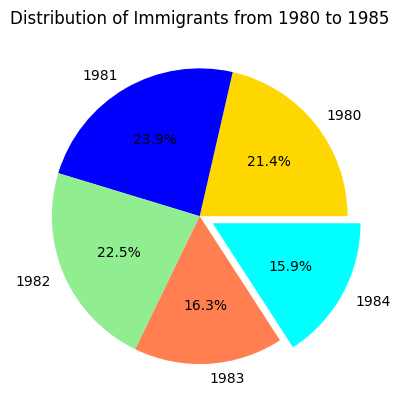

In [26]:
fig,ax=plt.subplots()

#Pie on immigrants
ax.pie(total_immigrants[0:5], labels=years[0:5], 
       colors = ['gold','blue','lightgreen','coral','cyan'],
       autopct='%1.1f%%',explode = [0,0,0,0,0.1]) #using explode to highlight the lowest 

ax.set_aspect('equal')  # Ensure pie is drawn as a circle

plt.title('Distribution of Immigrants from 1980 to 1985')
#plt.legend(years[0:5]), include legend, if you donot want to pass the labels
plt.show()

### Question: Create a pie chart representing the total immigrants proportion for each continent

First, you will have to group the data over continents and get the sum on total. Then you can pass this data to the pie function


In [27]:
#Creating data for plotting pie
df_con=df_can.groupby('Continent')['Total'].sum().reset_index()
label=list(df_con.Continent)
label[3] = 'LAC'
label[4] = 'NA'
df_con

,Continent,Total
0,Africa,618948
1,Asia,3317794
2,Europe,1410947
3,Latin America and the Caribbean,765148
4,Northern America,241142
5,Oceania,55174


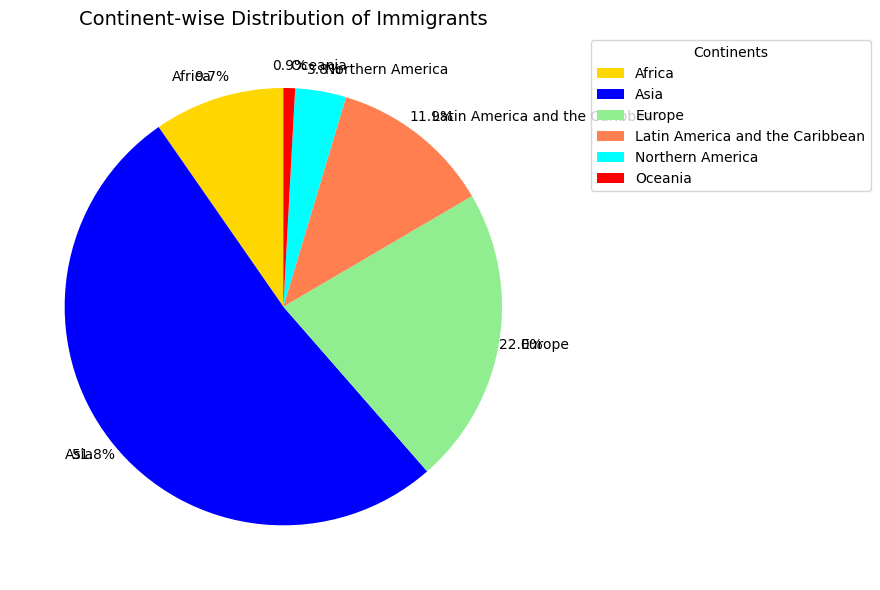

In [37]:
import matplotlib.pyplot as plt

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(10, 6))

ax.pie(
    df_con['Total'], 
    labels=df_con['Continent'],  # Use updated continent names directly from df_con
    colors=['gold', 'blue', 'lightgreen', 'coral', 'cyan', 'red'], 
    autopct='%1.1f%%', 
    pctdistance=1.1,  # Distance of the percentage labels from the center
    startangle=90     # Starting angle of the pie chart
)

# Set aspect ratio to ensure pie is circular
ax.set_aspect('equal')

# Add title
plt.title('Continent-wise Distribution of Immigrants', fontsize=14)

# Add legend
ax.legend(df_con['Continent'], title="Continents", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


<details><summary>Click here for a sample python solution</summary>

```python
    fig,ax=plt.subplots(figsize=(10, 4))

    #Pie on immigrants
    ax.pie(df_con['Total'], colors = ['gold','blue','lightgreen','coral','cyan','red'],
           autopct='%1.1f%%', pctdistance=1.25)

    ax.set_aspect('equal')  # Ensure pie is drawn as a circle

    plt.title('Continent-wise distribution of immigrants')
    ax.legend(label,bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()
 ```
    </details>


---


# Sub-plotting<a id="18"></a>


Let us explore how to display more than one plot on the same figure and specify the number of rows and columns to be created to the subplots function.  

For instance, let’s create a line and scatter plot in one row <br>
plt.subplots() <br>
You can use the same functions using which you plotte lne and scatter plots at the start of this lab
<br>
Both the subplots will be sharing the same y-axis as the data in the y-axis is the same. So, assign the ‘Sharey’ parameter as True in the code below. Also notice the use of 'suptitle'


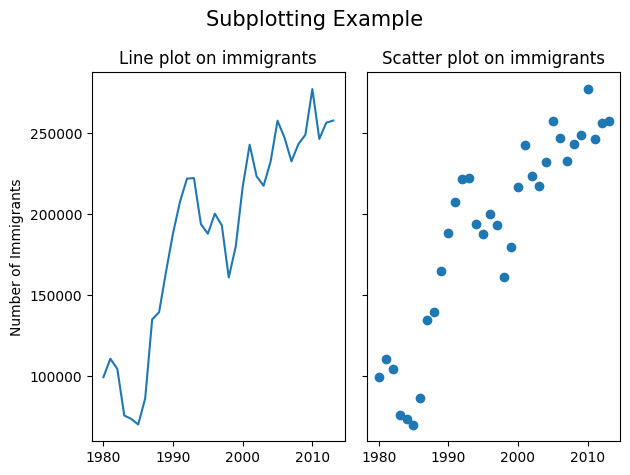

In [38]:
# Create a figure with two axes in a row

fig, axs = plt.subplots(1, 2, sharey=True)

#Plotting in first axes - the left one
axs[0].plot(total_immigrants)
axs[0].set_title("Line plot on immigrants")

#Plotting in second axes - the right one
axs[1].scatter(total_immigrants.index, total_immigrants)
axs[1].set_title("Scatter plot on immigrants")

axs[0].set_ylabel("Number of Immigrants")
            
#Adding a Title for the Overall Figure
fig.suptitle('Subplotting Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()

You can also implement the subplotting with **add_subplot()** as below:-


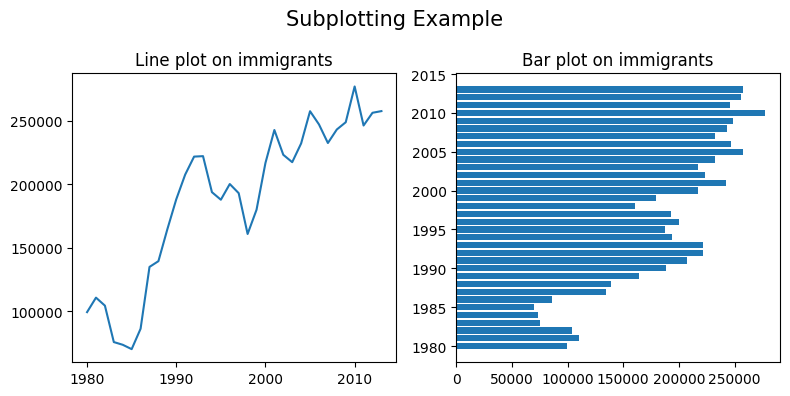

In [39]:
# Create a figure with Four axes - two rows, two columns
fig = plt.figure(figsize=(8,4))

# Add the first subplot (top-left)
axs1 = fig.add_subplot(1, 2, 1)
#Plotting in first axes - the left one
axs1.plot(total_immigrants)
axs1.set_title("Line plot on immigrants")

# Add the second subplot (top-right)
axs2 = fig.add_subplot(1, 2, 2)
#Plotting in second axes - the right one
axs2.barh(total_immigrants.index, total_immigrants) #Notice the use of 'barh' for creating horizontal bar plot
axs2.set_title("Bar plot on immigrants")
            
#Adding a Title for the Overall Figure
fig.suptitle('Subplotting Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()

### Question: Choose any four plots, which you have developed in this lab, with subplotting display them in a 2x2 display


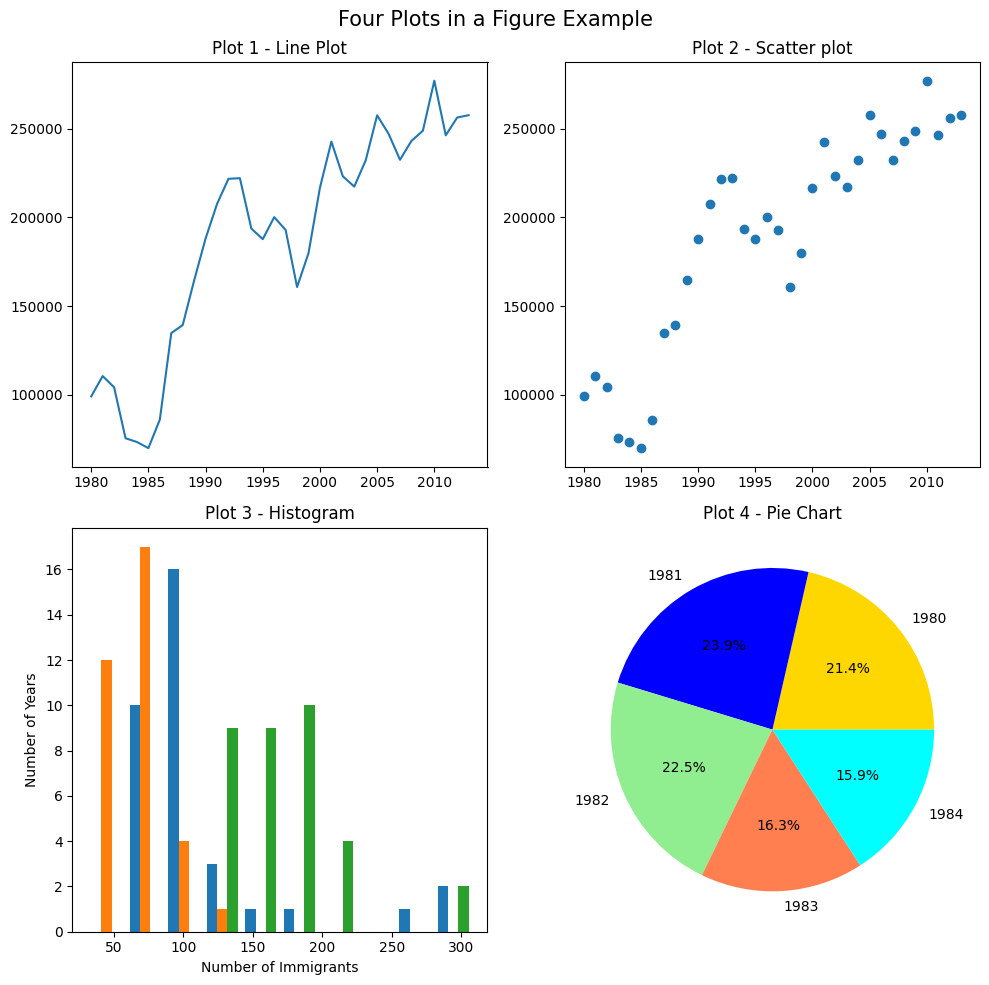

In [40]:
# Create a figure with Four axes - two rows, two columns
fig = plt.figure(figsize=(10, 10))

# Add the first subplot (top-left)
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(total_immigrants)  # Line plot of total immigrants
ax1.set_title('Plot 1 - Line Plot')

# Add the second subplot (top-right)
ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(total_immigrants.index, total_immigrants)  # Scatter plot of total immigrants
ax2.set_title('Plot 2 - Scatter plot')

# Add the third subplot (bottom-left)
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(df_dns)  # Histogram of data, such as immigration data over years
ax3.set_title('Plot 3 - Histogram')
ax3.set_xlabel('Number of Immigrants')
ax3.set_ylabel('Number of Years')

# Add the fourth subplot (bottom-right)
ax4 = fig.add_subplot(2, 2, 4)
ax4.pie(total_immigrants[0:5], labels=years[0:5], 
        colors=['gold', 'blue', 'lightgreen', 'coral', 'cyan'], 
        autopct='%1.1f%%')  # Pie chart for the top 5 years of immigration
ax4.set_aspect('equal')
ax4.set_title('Plot 4 - Pie Chart')

# Adding a Title for the Overall Figure
fig.suptitle('Four Plots in a Figure Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()


<details><summary>Click here for a sample python solution</summary>

```python
    # Create a figure with Four axes - two rows, two columns
    fig = plt.figure(figsize=(10, 10))

    # Add the first subplot (top-left)
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.plot(total_immigrants)
    ax1.set_title('Plot 1 - Line Plot')

    # Add the second subplot (top-right)
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.scatter(total_immigrants.index, total_immigrants)
    ax2.set_title('Plot 2 - Scatter plot')

    # Add the third subplot (bottom-left)
    ax3 = fig.add_subplot(2, 2, 3)
    ax3.hist(df_dns)
    ax3.set_title('Plot3 - Histogram') 
    ax3.set_xlabel('Number of Immigrants')
    ax3.set_ylabel('Number of Years')

    # Add the fourth subplot (bottom-right)
    ax4 = fig.add_subplot(2, 2, 4)
    ax4.pie(total_immigrants[0:5], labels=years[0:5], 
           colors = ['gold','blue','lightgreen','coral','cyan'],
           autopct='%1.1f%%')
    ax4.set_aspect('equal')  
    ax4.set_title('Plot 5 - Pie Chart')

    #Adding a Title for the Overall Figure
    fig.suptitle('Four Plots in a Figure Example', fontsize=15)

    # Adjust spacing between subplots
    fig.tight_layout()


    # Show the figure
    plt.show()
  ```
    </details>


---


### Congratulations! you have completed this lab!

## Author

[Dr. Pooja]()

### Other Contributors

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>



``` toggle## Change Log
```
``` toggle| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
```
``` toggle | ----------------- | ------- | ------------- | ---------------------------------- |
```
``` toggle | 2023-06-19        | 1.0     | Dr. Pooja        | initial version created   |
```


